In [1]:
import numpy as np
import pandas as pd
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from test import *
from RFC import *
from sklearn.externals import joblib
from matplotlib.font_manager import FontProperties
%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\Fish\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Fish\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
np.set_printoptions(threshold=np.nan)

In [2]:
path = "F:\AIPT实验室\脑电项目\edfmat2"
eegdata = load_data(path)
orig_data, label = feature_extract(eegdata)
orig_data = orig_data.T

In [3]:
orig_data.shape

(1996, 1273)

In [5]:
data_scaled = prep.scale(orig_data)

In [6]:
data_scaled.shape

(1996, 1273)

In [7]:
Data = pd.DataFrame(data_scaled, columns=range(data_scaled.shape[1]))
Data['label'] = label

In [8]:
Data['label'].value_counts()

0.0    1215
1.0     613
2.0     168
Name: label, dtype: int64

In [9]:
RFC1 = RFC(data_scaled, label)

In [10]:
X_train, y_train, X_test, y_test = RFC1.split_data_set(1500)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1500, 1273), (1500,), (496, 1273), (496,))

In [65]:
param_test1= {'n_estimators':list(range(5,80,5))}
bestparams1, rf1 = RFC1.search_best_params(X_train, y_train, param_test1)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 100, 'n_estimators': 45}


In [66]:
param_test2= {'n_estimators':[45], 'max_depth':list(range(2,20,2)), 'min_samples_split':list(range(20,150,10))}
bestparams2, rf2 = RFC1.search_best_params(X_train, y_train, param_test2)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 80, 'n_estimators': 45}


In [67]:
param_test3= {'n_estimators':[45], 'max_depth':[6], 'min_samples_leaf':list(range(5,50,5)), 'min_samples_split': list(range(10,100,10))}
bestparams3, rf3 = RFC1.search_best_params(X_train, y_train, param_test3)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 45}


In [13]:
param_test4= {'n_estimators':[30], 'max_depth':[10], 'min_samples_leaf':[5], 'min_samples_split': [20], 'max_features':[600]}
bestparams4, rf4 = RFC1.search_best_params(X_train, y_train, param_test4)

{'max_depth': 10, 'max_features': 600, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 30}


In [16]:
y_pred_train, y_pred_test = RFC1.rf_train(rf4, X_train, y_train, X_test, y_test)

train accuracy:  0.9573333333333334
test accuracy:  0.8850806451612904


In [26]:
# joblib.dump(rf4, 'rf_1000.pkl')
joblib.dump(rf4, 'rf_1000_new.pkl')

['rf_1000_new.pkl']

In [57]:
a = rf4.feature_importances_
index = np.argsort(a)
index = index[:50]
data_scale_50 = data_scaled[:,index]
data_scale_50.shape

(1996, 50)

In [58]:
RFC2 = RFC(data_sclae_50, label)

In [59]:
X_train, y_train, X_test, y_test = RFC2.split_data_set(1500)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1500, 50), (1500,), (496, 50), (496,))

In [60]:
param_test1= {'n_estimators':list(range(5,80,5))}
bestparams1, rf1 = RFC2.search_best_params(X_train, y_train, param_test1)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 100, 'n_estimators': 35}


In [61]:
param_test2= {'n_estimators':[35], 'max_depth':list(range(2,20,2)), 'min_samples_split':list(range(20,150,20))}
bestparams2, rf2 = RFC2.search_best_params(X_train, y_train, param_test2)

{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 140, 'n_estimators': 35}


In [63]:
param_test3= {'n_estimators':[35], 'max_depth':[12], 'min_samples_leaf':list(range(5,30,5)), 'min_samples_split': list(range(150,250,10))}
bestparams3, rf3 = RFC2.search_best_params(X_train, y_train, param_test3)

{'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 190, 'n_estimators': 35}


In [65]:
param_test4= {'n_estimators':[30], 'max_depth':[10], 'min_samples_leaf':[5], 'min_samples_split': [190], 'max_features':list(range(10,50,5))}
bestparams4, rf5 = RFC2.search_best_params(X_train, y_train, param_test4)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 190, 'n_estimators': 30}


In [66]:
y_pred_train, y_pred_test = RFC2.rf_train(rf5, X_train, y_train, X_test, y_test)

train accuracy:  0.8533333333333334
test accuracy:  0.875


In [67]:
# joblib.dump(rf4, 'rf_1000.pkl')
joblib.dump(rf5, 'rf_1000_50.pkl')

['rf_1000_50.pkl']

In [27]:
def load_long_data(file):
    file = "F:\\AIPT实验室\\脑电项目\\" + file + ".mat"
    Try_data = sio.loadmat(file)
    Try_data = Try_data['data']
    m = int(Try_data.shape[1]/1000)
    try_data = np.zeros((19,1000,m))
    for i in range(m):
        try_data[:,:,i] = Try_data[:,i*1000:(i+1)*1000]
    print("The shape of data :", try_data.shape)
    t = try_data.shape[2]
    return Try_data, try_data, m, t

In [77]:
def get_feature(try_data, m):
    Feature_data = []
    for i in range(m):
        feature = transform(try_data[:,:,i])
        Feature_data.append(feature[:,np.newaxis])
    Feature_data = np.concatenate(Feature_data, axis=-1)
    norm_data = prep.scale(Feature_data.T)
    print("The shape of norm_data extracted feature :", norm_data.shape)
    return norm_data

In [79]:
def eeg_demo_show(file):
    Try_data, try_data, m, t = load_long_data(file)
    norm_data = get_feature(try_data, m)    
    clf = joblib.load("rf_1000_new.pkl")
    pred = clf.predict(norm_data)
    plot_demo(Try_data, pred, t, file)

In [80]:
def plot_demo(Try_data, pred, t, file):
    fig = plt.figure(figsize=[15,10])
    TitleList = ["Fp1-A1","Fp2-A2","F3-A1","F4-A2","C3-A1","C4-A2",
                 "P3-A1","P4-A2","O1-A1","O2-A2","F7-A1","F8-A2",
                 "T3-A1","T4-A2","T5-A1","T6-A2","Fz-Aav","Cz-Aav","Pz-Aav"]
    font = {'family' : 'Arial',
             'weight' : 'normal',
             'size'   : 10,
             'rotation' : 'horizontal',
             'horizontalalignment' : 'right',
             'verticalalignment' : 'center'}
    local = {}
    
    sss = 8
    
    for i in range(sss):
        plt.subplot(sss+1,1,i+1)
        plt.plot(-Try_data[i,:])
        plt.ylabel(TitleList[i], font)
    x = np.arange(0.0, t ,0.001)
    l = len(x)
    step = 1000
    m = int(l/step)
    y1 = np.zeros(m)
    y2 = np.zeros(m)
    y3 = np.zeros(m)
    y1[pred == 0] = 1
    y2[pred == 1] = 1
    y3[pred == 2] = 1
    yyy = np.zeros(l)
    yy1 = np.zeros(l)
    yy2 = np.zeros(l)
    yy3 = np.zeros(l)
    for i in range(m):
        if y1[i] == 1:
            yy1[i*step:(i+1)*step] = 200
        if y2[i] == 1:
            yy2[i*step:(i+1)*step] = 200
        if y3[i] == 1:
            yy3[i*step:(i+1)*step] = 200
    ax = plt.subplot(sss+1,1,sss+1)
    ax.plot(x, yyy, x, yy1, x, yy2, x, yy3, color = 'white')
    ax.fill_between(x, yyy, yy1, where=yyy<yy1, facecolor='green', label = 'normal')
    ax.fill_between(x, yyy, yy2, where=yyy<yy2, facecolor='red', label = 'abnormal')
    ax.fill_between(x, yyy, yy3, where=yyy<yy3, facecolor='blue', label = 'interfering')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=20)
    plt.suptitle("EEG detection demo of "+file, fontproperties=font)
    plt.savefig('EEG_detection'+file+'.png')
    plt.show()

The shape of data : (19, 1000, 49)
The shape of norm_data extracted feature : (49, 1273)


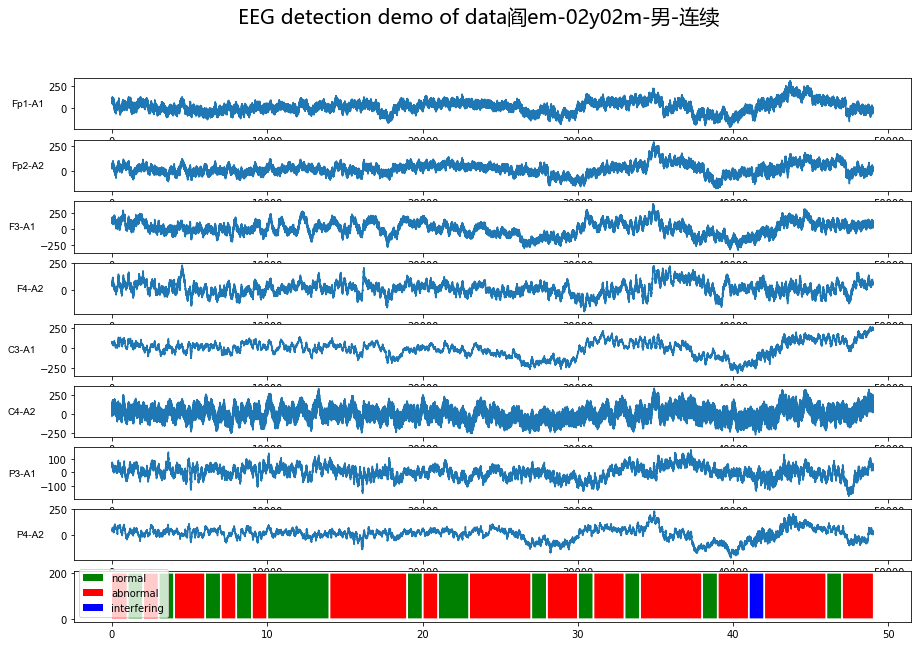

In [85]:
file = "data"
file1 = "data李jm-14y04m-女-连续"
file2 = "data刘xj-10y06m-男-连续"
file3 = "data阎em-02y02m-男-连续"
eeg_demo_show(file3)

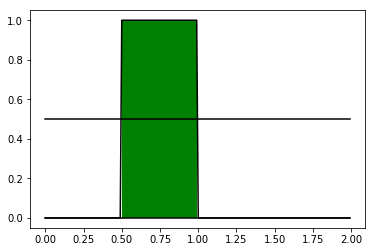

In [97]:
x = np.arange(0.0, 2, 0.01)
l = x.shape
y1 = np.zeros(l)
y2 = np.zeros(l)
y3 = y2+0.5
y2[50:100] = 1
# y1[100:] = 0
ax = plt.subplot()
ax.plot(x, y1, x, y2,x, y3, color='black')
ax.fill_between(x, y1, y2, where=y2>y1, facecolor='green')
# ax.fill_between(x, y1, y3, where=y3<=y1, facecolor='red')
plt.show()

In [138]:
y1 = np.zeros(m)
y1[predppt == 0] = 1
y1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:

for i in range(m):
    feature = transform(data[i])
    X.append(feature[:,np.newaxis])
    y.append(label[i])
X = np.concatenate(X, axis=-1)
y = np.array(y)
return X, y

(1280, 60)


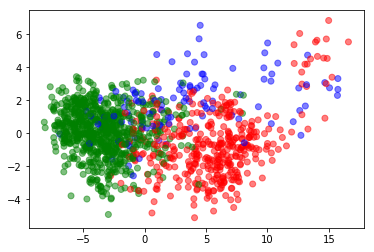

In [19]:
im = rf4.feature_importances_
ind = np.argsort(im)[::-1]
X_import = X_train[:,ind[:60]]
print (X_import.shape)
plot_2D(X_import, y_train, [0,1,2])

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

# Confusion_matrix

Confusion matrix, without normalization
[[427  18   1]
 [ 20 194   0]
 [ 26  24   6]]


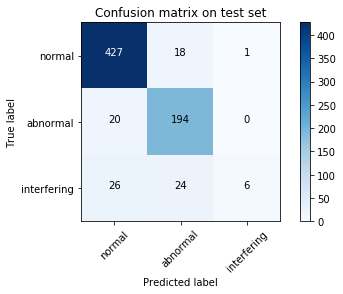

In [44]:
cnf_matrix = confusion_matrix(rf4.predict(X_test), y_test)
plt.figure()
RFC.plot_confusion_matrix(cnf_matrix, rf4.predict(X_test), y_test, classes=['normal','abnormal','interfering'],
                      title='Confusion matrix on test set') 

Confusion matrix, without normalization
[[764   5   0]
 [  7 392   0]
 [ 25   6  81]]


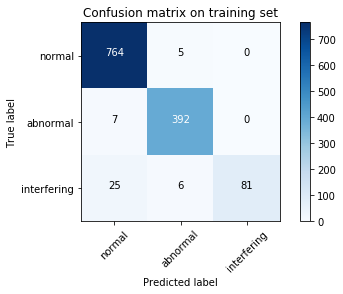

In [45]:
cnf_matrix = confusion_matrix(rf4.predict(X_train), y_train)
plt.figure()
RFC.plot_confusion_matrix(cnf_matrix, rf4.predict(X_train), y_train, classes=['normal','abnormal','interfering'],
                      title='Confusion matrix on training set')

In [46]:
print(classification_report(rf4.predict(X_test), y_test,labels=[0,1,2],target_names=['normal','abnormal','interfering'],digits=3))

             precision    recall  f1-score   support

     normal      0.957     0.903     0.929       473
   abnormal      0.907     0.822     0.862       236
interfering      0.107     0.857     0.190         7

avg / total      0.932     0.876     0.900       716



In [47]:
print(classification_report(rf4.predict(X_train), y_train,labels=[0,1,2],target_names=['normal','abnormal','interfering'],digits=3))

             precision    recall  f1-score   support

     normal      0.993     0.960     0.976       796
   abnormal      0.982     0.973     0.978       403
interfering      0.723     1.000     0.839        81

avg / total      0.973     0.966     0.968      1280

